In [494]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [495]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [496]:
df = pd.read_csv('Walmart_Store_sales.csv')

# EDA & DATA PREPROCESSING

##### STATS

In [497]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [498]:
df['Weekly_Sales'] = (df['Weekly_Sales']/1000).round()
df= df.rename(columns={'Weekly_Sales':'Weekly_Sales_k€'})
df.head()

,Store,Date,Weekly_Sales_k€,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572.0,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1808.0,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244.0,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644.0,0.0,78.89,2.759,212.412888,7.092


In [499]:
#Date column: create column year, month, day, day of week

In [500]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y')
df['Date'].dtypes

dtype('<M8[ns]')

In [501]:
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')
df['Day'] = df['Date'].dt.strftime('%d')
df['Day_of_week'] = df['Date'].dt.strftime('%A')
df = df.drop('Date', axis=1)
df.head()

,Store,Weekly_Sales_k€,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,1572.0,NaN,59.61,3.045,214.777523,6.858,2011,02,18,Friday
1,13.0,1808.0,0.0,42.38,3.435,128.616064,7.470,2011,03,25,Friday
2,17.0,NaN,0.0,NaN,NaN,130.719581,5.936,2012,07,27,Friday
3,11.0,1244.0,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644.0,0.0,78.89,2.759,212.412888,7.092,2010,05,28,Friday


##### EDA SALES

In [502]:
Sales_per_year = pd.DataFrame(df.groupby(['Year'])['Weekly_Sales_k€'].sum()).reset_index()
Sales_per_year

,Year,Weekly_Sales_k€
0,2010,64376.0
1,2011,48386.0
2,2012,35591.0


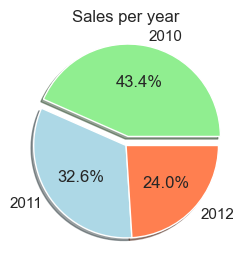

In [503]:
labels = [2010, 2011, 2012]
explode = (0.1, 0, 0)
colors = ['#90EE90', '#ADD8E6', '#FF7F50']
plt.pie(data=Sales_per_year, x="Weekly_Sales_k€", labels = labels, explode = explode, shadow=True, autopct='%1.1f%%', colors=colors);
plt.title('Sales per year');


In [504]:
Sales_per_month = pd.DataFrame(df.groupby(['Month'])['Weekly_Sales_k€'].sum()).reset_index()
Sales_per_month

,Month,Weekly_Sales_k€
0,01,7602.0
1,02,18279.0
2,03,13990.0
3,04,8416.0
4,05,15309.0
5,06,16710.0
6,07,15971.0
7,08,13853.0
8,09,6867.0
9,10,6502.0


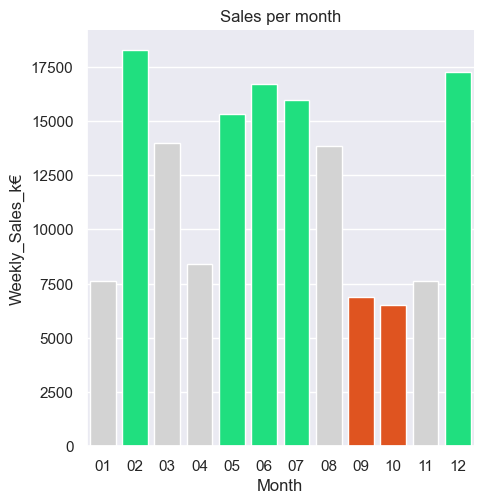

In [505]:
def set_up_palette(series):
    pal = []

    for i in series: 
        if i >= 15000: 
            pal.append('springgreen')
        elif i <= 7000:
            pal.append('orangered')
        else:
            pal.append('lightgrey')
    return pal

sns.set_style(style="darkgrid")
sns.catplot(data=Sales_per_month, y="Weekly_Sales_k€", x='Month', kind='bar', palette = set_up_palette(Sales_per_month['Weekly_Sales_k€'])).set(title = 'Sales per month');

In [506]:
Sales_per_store = pd.DataFrame(df.groupby(['Store'])['Weekly_Sales_k€'].sum()).reset_index()
Sales_per_store

,Store,Weekly_Sales_k€
0,1.0,14061.0
1,2.0,15545.0
2,3.0,4836.0
3,4.0,13043.0
4,5.0,2420.0
5,6.0,9305.0
6,7.0,4472.0
7,8.0,5333.0
8,9.0,2027.0
9,10.0,9110.0


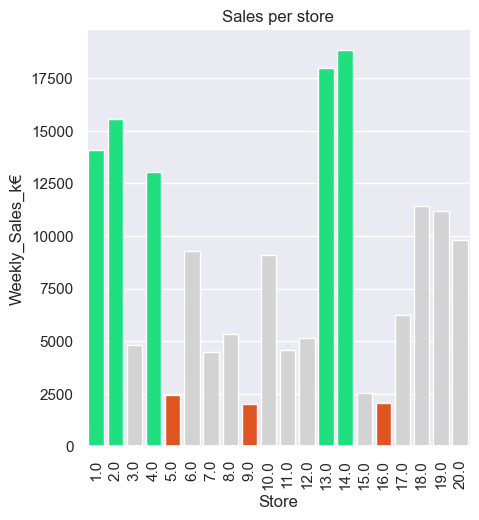

In [507]:
def set_up_palette(series):
    pal = []

    for i in series: 
        if i >= 12500: 
            pal.append('springgreen')
        elif i <= 2500:
            pal.append('orangered')
        else:
            pal.append('lightgrey')
    return pal

sns.set_style(style="darkgrid")
sns.catplot(data=Sales_per_store, y="Weekly_Sales_k€", x='Store', kind='bar', palette = set_up_palette(Sales_per_store['Weekly_Sales_k€'])).set(title = 'Sales per store');
plt.xticks(rotation=90);


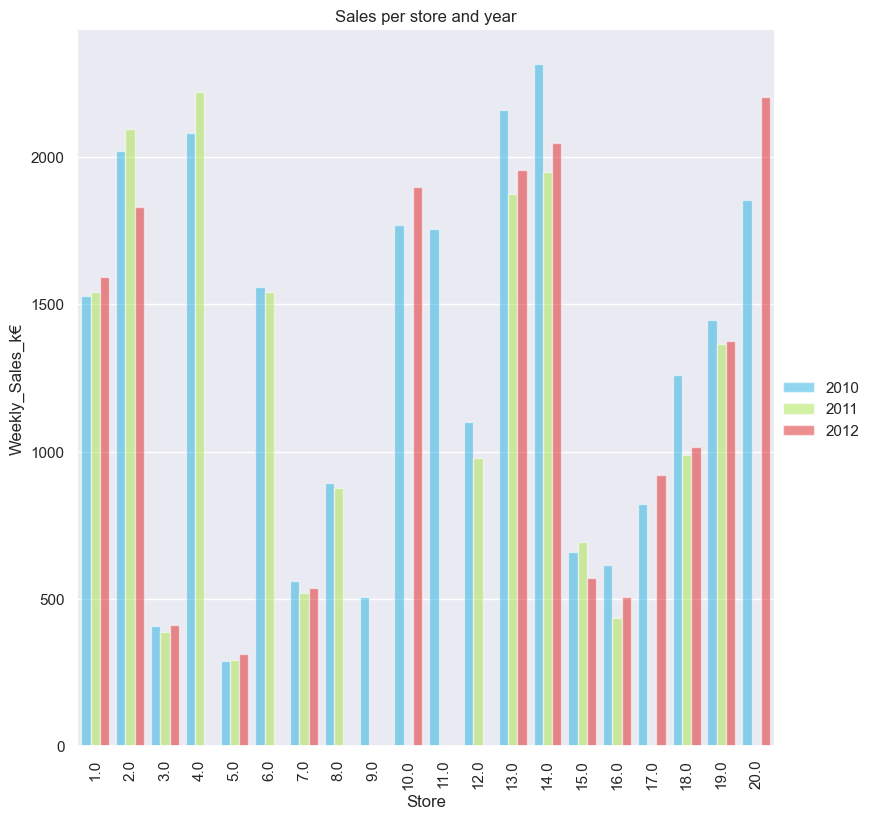

In [508]:
colors = {'2010':'deepskyblue', '2011':'greenyellow', '2012':'red'}
order = ['2010','2011','2012']
g = sns.catplot(data=df, x="Store", y="Weekly_Sales_k€", hue='Year', hue_order= order, kind='bar', errorbar=None, alpha=.5, height=8, palette=colors).set(title='Sales per store and year');
g.set_xticklabels(rotation=90)
g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

##### EDA CORRELATION BETWEEN WEEKLY SALES & OTHERS VARIABLES

C:\Users\fanny\AppData\Local\Temp\ipykernel_104000\2628659580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


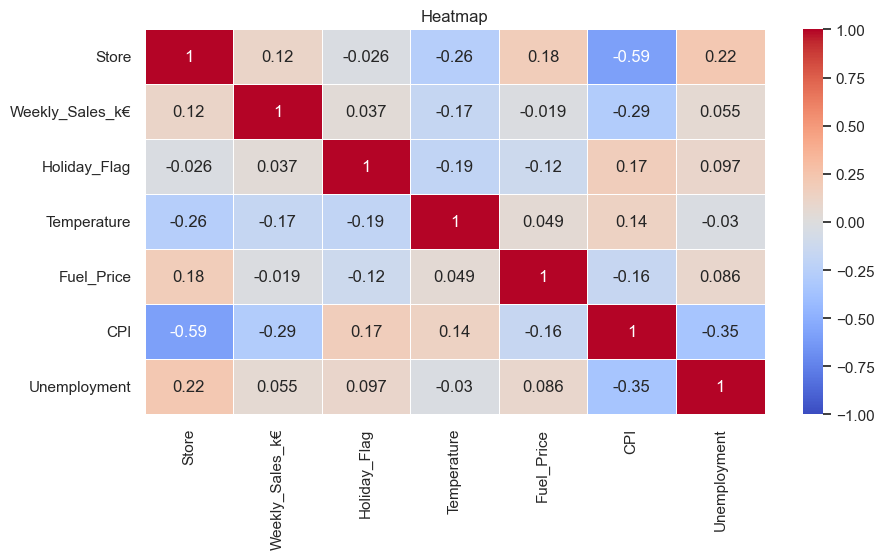

In [509]:
plt.subplots(figsize=(10,5))
corr = df.corr()
ax=sns.heatmap(data=corr, cmap="coolwarm", vmin = -1, vmax= 1, center = 0, annot=True, linewidths=.5);
ax.set_title("Heatmap");


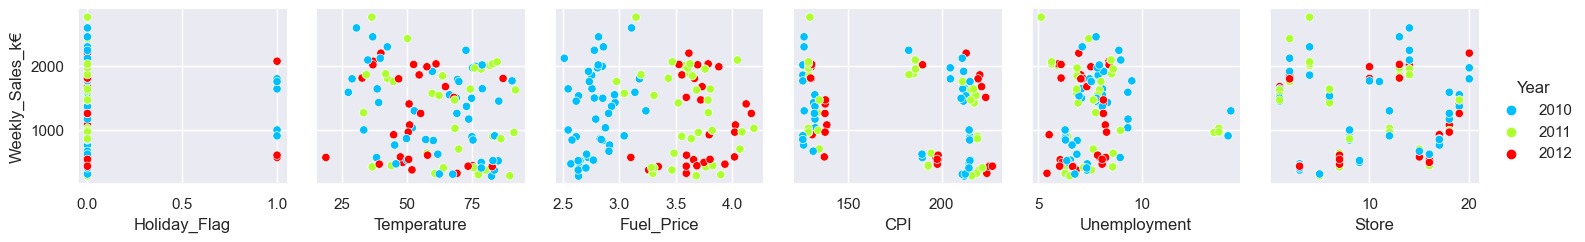

In [510]:
x_vars = ["Holiday_Flag","Temperature", "Fuel_Price", "CPI", "Unemployment", "Store"]
y_vars = ["Weekly_Sales_k€"]
order = ['2010','2011','2012']
colors = {'2010':'deepskyblue', '2011':'greenyellow', '2012':'red'}
g = sns.PairGrid(df, x_vars=x_vars, y_vars=y_vars, hue='Year', hue_order=order, diag_sharey=False, palette=colors);
g.map_diag(sns.histplot, hue=None, color=".3");
g.map_offdiag(sns.scatterplot);
g.add_legend();


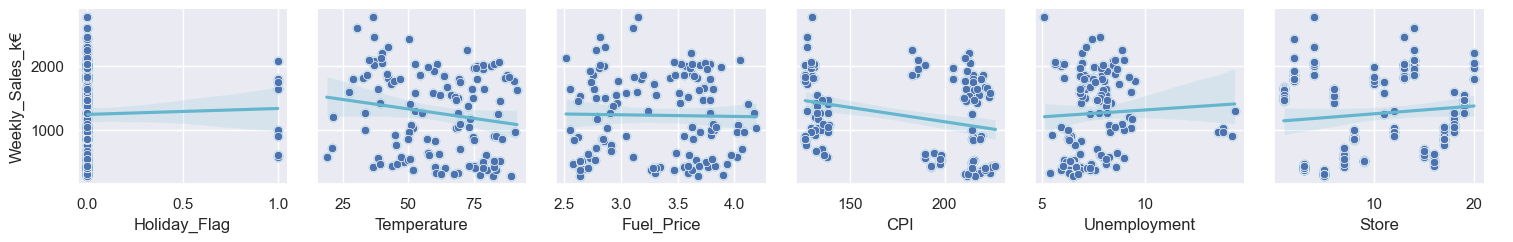

In [511]:
x_vars = ["Holiday_Flag","Temperature", "Fuel_Price", "CPI", "Unemployment", "Store"]
y_vars = ["Weekly_Sales_k€"]
order = ['2010','2011','2012']
colors = {'2010':'deepskyblue', '2011':'greenyellow', '2012':'red'}
g = sns.PairGrid(df, x_vars=x_vars, y_vars=y_vars, diag_sharey=False);
g.map(sns.regplot, color="c");
g.map_offdiag(sns.scatterplot);
g.add_legend();


##### PRE PROCESSING

In [512]:
#Drop Nan values in the target

In [513]:
df = df.dropna(subset=['Weekly_Sales_k€'], axis=0)
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])


Percentage of missing values: 


Store               0.000000
Weekly_Sales_k€     0.000000
Holiday_Flag        8.088235
Temperature        11.029412
Fuel_Price          8.823529
CPI                 8.088235
Unemployment       10.294118
Year               13.235294
Month              13.235294
Day                13.235294
Day_of_week        13.235294
dtype: float64

In [514]:
#Drop lines containing invalid values or outliers: all the numeric features that don't fall within the range -3σ +3σ.
#This concerns the columns : Temperature, Fuel_price, CPI and Unemployment

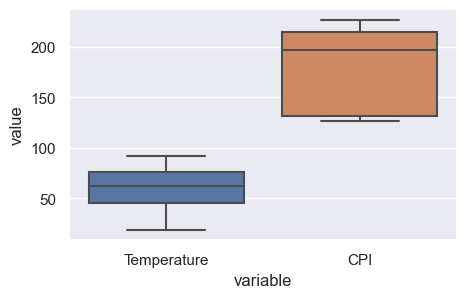

In [515]:
data = pd.DataFrame(data=df, columns=["Temperature", "CPI"])
plt.figure(figsize = (5,3))
g = sns.boxplot(x="variable", y="value", data=pd.melt(data))
plt.show()

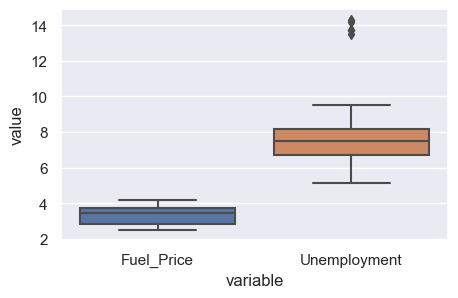

In [516]:
data = pd.DataFrame(data=df, columns=["Fuel_Price", "Unemployment"])
plt.figure(figsize = (5,3))
g = sns.boxplot(x="variable", y="value", data=pd.melt(data))
plt.show()

In [517]:
list_col = ['Temperature','Fuel_Price','CPI','Unemployment']

In [518]:
for col in list_col:
    upper_limit = df[col].mean() + 3*df[col].std()
    lower_limit = df[col].mean() - 3*df[col].std()
    df_clean = df[(df[col]<upper_limit) & (df[col]>lower_limit)]
df_clean

,Store,Weekly_Sales_k€,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,1572.0,NaN,59.61,3.045,214.777523,6.858,2011,02,18,Friday
1,13.0,1808.0,0.0,42.38,3.435,128.616064,7.470,2011,03,25,Friday
3,11.0,1244.0,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644.0,0.0,78.89,2.759,212.412888,7.092,2010,05,28,Friday
5,4.0,1858.0,0.0,NaN,2.756,126.160226,7.896,2010,05,28,Friday
...,...,...,...,...,...,...,...,...,...,...,...
142,3.0,403.0,0.0,75.54,3.285,NaN,7.197,2011,10,07,Friday
143,3.0,397.0,0.0,78.53,2.705,214.495838,7.343,2010,06,04,Friday
144,3.0,425.0,0.0,73.44,3.594,226.968844,6.034,2012,10,19,Friday
145,14.0,2249.0,0.0,72.62,2.780,182.442420,8.899,2010,06,18,Friday


# BASELINE MODEL: linear regression

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio



##### PRE PROCESSING WITH SCIKIT-LEARN

In [520]:
#Categorical variables : Store, Holiday_Flag
#Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, Day_Of_Week

In [521]:
X = df_clean.drop(columns=['Weekly_Sales_k€','Day_of_week'], axis=1)
y = df_clean['Weekly_Sales_k€']

In [522]:
X = X.astype({"Store":"object","Holiday_Flag":'object', "Year":"float64", "Month":"float64", "Day":"float64"})

In [523]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [524]:
# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns # numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns # categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop="first", handle_unknown = 'ignore')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test = preprocessor.transform(X_test)

##### LINEAR REGRESSION

In [525]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_train_pred = linear_regressor.predict(X_train)
y_test_pred = linear_regressor.predict(X_test)
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("RMSE score on training set : ", np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))
print("RMSE score on test set : ", np.sqrt(mean_squared_error(y_test,y_test_pred)))


R2 score on training set :  0.9726318208436446
RMSE score on training set :  108.90085838882482
R2 score on test set :  0.9539011111860205
RMSE score on test set :  132.77598274242965


In [526]:
categorical_column_names = preprocessor.transformers_[1][1]\
   ['encoder'].get_feature_names_out(categorical_features)
numerical_column_names = X.loc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
all_column_names = np.append(categorical_column_names, numerical_column_names)
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": linear_regressor.coef_
})

feature_importance

,feature_names,coefficients
0,Store_2.0,-55.206110
1,Store_3.0,-24.375428
2,Store_4.0,108.581405
3,Store_5.0,-90.791280
4,Store_6.0,-12.848800
5,Store_7.0,75.635718
6,Store_8.0,-32.714707
7,Store_9.0,339.361653
8,Store_10.0,-1240.664236
9,Store_11.0,682.325619


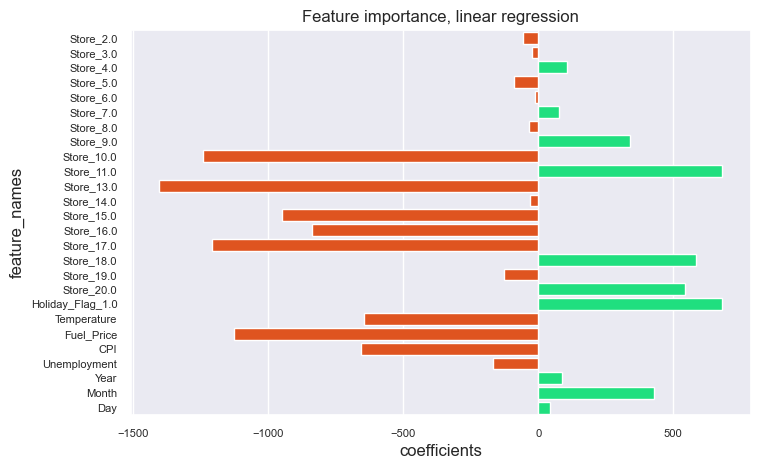

In [527]:
color = ['orangered' if x < 0 else 'springgreen' for x in feature_importance['coefficients']]
plt.figure(figsize = (8,5))
sns.barplot(data=feature_importance, x='coefficients', y='feature_names', errorbar=None, palette=color).set(title= 'Feature importance, linear regression');
plt.tick_params(axis = 'both', labelsize = 8)

# FIGHT OVERFITTING

##### REGULARIZED LINEAR REGRESSION MODEL

In [528]:
# Ridge and Lasso

In [529]:
def test(models):
    results = {}
    for key, value in models.items():
        r2_train = []
        rmse_train = []
        r2_test = []
        rmse_test = []
        for j in range(50):  
            value.fit(X_train, y_train)
            y_train_pred = value.predict(X_train)
            y_test_pred = value.predict(X_test)
            r2_train.append(r2_score(y_train, y_train_pred))
            rmse_train.append(np.sqrt(mean_squared_error(y_train,y_train_pred)))
            r2_test.append(r2_score(y_test, y_test_pred))
            rmse_test.append(np.sqrt(mean_squared_error(y_test,y_test_pred)))
        results[key] = [np.mean(r2_train), np.mean(rmse_train), np.mean(r2_test), np.mean(rmse_test)]
    results['Indicators'] = ['R2 train','RMSE train','R2 test', 'RMSE test']
    return pd.DataFrame(results)

In [530]:
models1 = {'OLS': LinearRegression(),
           'Ridge': Ridge(),
           'Lasso': Lasso()      
         }
test(models1)

,OLS,Ridge,Lasso,Indicators
0,0.972632,0.927916,0.970637,R2 train
1,108.900858,176.737677,112.800331,RMSE train
2,0.953901,0.925451,0.957675,R2 test
3,132.775983,168.848037,127.225262,RMSE test


In [531]:
# The 3 models have good performances, but:  
#   - OLS and LASSO perform better as the R2 is 0.97 on the training set and 0.95 on the test set. They both have an RMSE between 103 and 108. 
#   - RIDGE has a R2 score lower (0.92 on training set & 0.88 on test set) and a RMSE higher (174 on training test and 231 on test set).

##### GRIDSEARCHCV

In [532]:
def test_grid(models):        
    results_grid = {}
    for key,values in models.items():
        optimal_value_for_alpha = []
        r2_train_grid = []
        rmse_train_grid  = []
        r2_test_grid  = []
        rmse_test_grid  = []
        for j in range(50):  
            grid = values.fit(X_train, y_train)
            y_train_pred = values.predict(X_train)
            y_test_pred = values.predict(X_test)
            optimal_value_for_alpha.append(grid.best_params_['alpha'])
            r2_train_grid .append(r2_score(y_train, y_train_pred))
            rmse_train_grid .append(np.sqrt(mean_squared_error(y_train,y_train_pred)))
            r2_test_grid .append(r2_score(y_test, y_test_pred))
            rmse_test_grid .append(np.sqrt(mean_squared_error(y_test,y_test_pred)))
            results_grid[key] = [np.mean(optimal_value_for_alpha), np.mean(r2_train_grid), np.mean(rmse_train_grid), np.mean(r2_test_grid), np.mean(rmse_test_grid)]
    results_grid['Indicators'] = ['best param alpha','R2 train','RMSE train','R2 test', 'RMSE test']
    return pd.DataFrame(results_grid)

In [533]:
params_ridge = {'alpha': np.arange(0,1,0.01)}
params_lasso = {'alpha' : [10**(-a) for a in range(10)]}
models2 = {'Ridge': GridSearchCV(Ridge(), params_ridge, cv=5),
          'Lasso': GridSearchCV(Lasso(),param_grid=params_lasso, cv = 5)
         }
test_grid(models2)

,Ridge,Lasso,Indicators
0,0.000000,0.100000,best param alpha
1,0.972632,0.972601,R2 train
2,108.900858,108.962095,RMSE train
3,0.953901,0.954503,R2 test
4,132.775983,131.906348,RMSE test


In [534]:
# After proceed the GridSearchCV: Ridge & Lasso have same results (R2 score and RMSE)
#   - Ridge perform better after the GridSearchCV and improve its R2 score on training set (0.97) and on test set (0.95), and decrease its RMSE. 
#   - Lasso gets a decrease of its RMSE after GridSearchCV. 
# => The three models are very good in predicting weeklysales.

